### Supervised Learning - Process flow

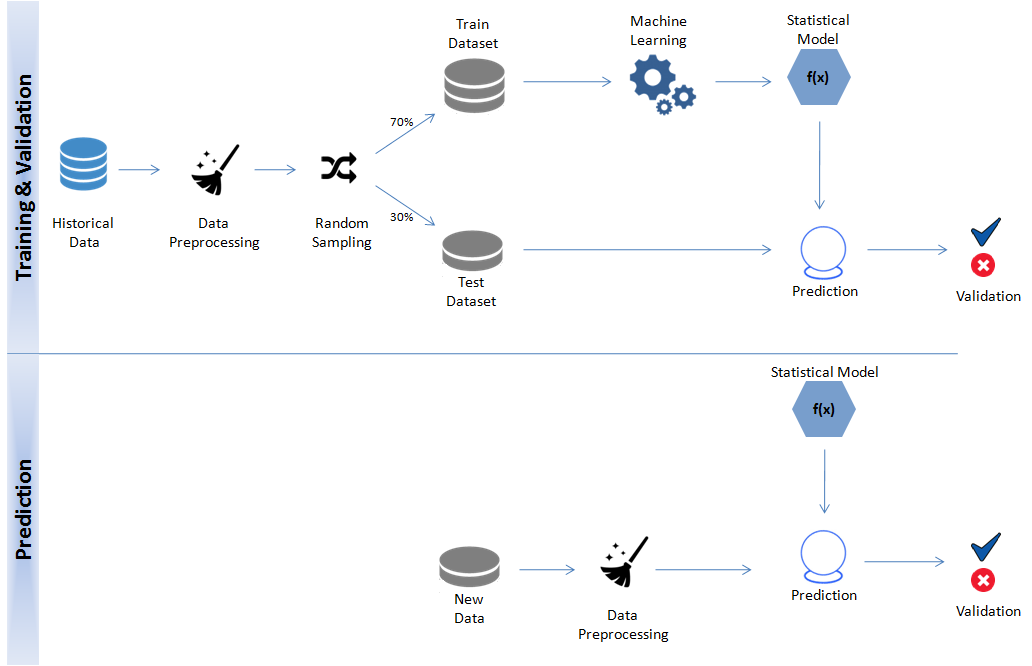

In [17]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/Supervised_Learning_Process_Flow.png', width=800)

### Multivariable and Multi-class Logistic Regression

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [18]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    # Ensure X and y are defined before splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0
    )
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}")

Training set size: 105
Testing set size: 45


### Train logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression

if __name__ == "__main__":
    # Specify solver='liblinear' to support L1 penalty
    lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=0)
    lr.fit(X_train, y_train)
    
    # Identify sparse coefficients where values are zero
    non_zero_features = np.count_nonzero(lr.coef_)
    print(f"Number of non-zero features after L1: {non_zero_features}")

Number of non-zero features after L1: 11


In [22]:
from sklearn import metrics

if __name__ == "__main__":
    # Training set evaluation
    train_pred = lr.predict(X_train)
    print("####### Training Set Performance #######")
    print(f"Train - Accuracy : {metrics.accuracy_score(y_train, train_pred):.4f}")
    print("Train - Confusion Matrix :")
    print(metrics.confusion_matrix(y_train, train_pred))
    print("Train - Classification Report :")
    print(metrics.classification_report(y_train, train_pred))

    # Test set evaluation
    test_pred = lr.predict(X_test)
    print("\n####### Test Set Performance #######")
    print(f"Test - Accuracy : {metrics.accuracy_score(y_test, test_pred):.4f}")
    print("Test - Confusion Matrix :")
    print(metrics.confusion_matrix(y_test, test_pred))
    print("Test - Classification Report :")
    print(metrics.classification_report(y_test, test_pred))

####### Training Set Performance #######
Train - Accuracy : 0.9810
Train - Confusion Matrix :
[[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105


####### Test Set Performance #######
Test - Accuracy : 0.9778
Test - Confusion Matrix :
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97    

### Logistic Regression Diagnostics

Overfitting occurs when the model fits the data very well capturing all the noises. 

Let's understand the issue by looking at some example dataset.

#### Fitting logistic regression for two independent variable which are linearly separatable

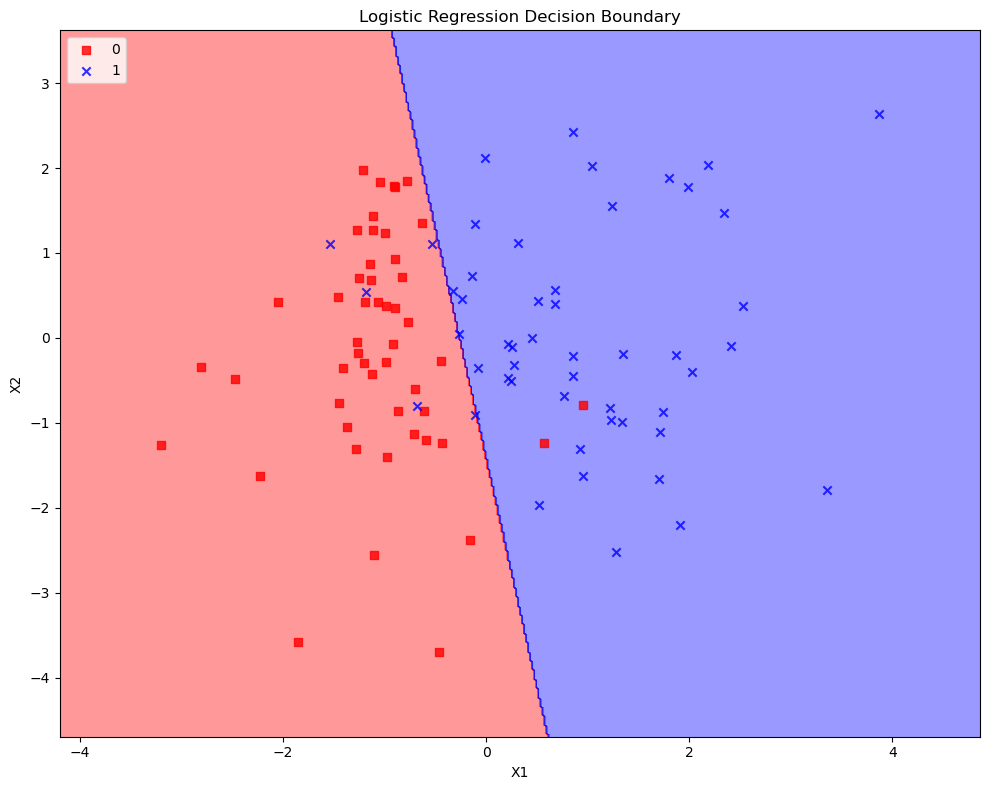

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def plot_decision_regions(X, y, classifier):
    h = 0.02
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

if __name__ == "__main__":
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                               n_redundant=0, weights=[.5, .5], random_state=0) 

    clf = LogisticRegression().fit(X, y)

    plt.figure(figsize=(10, 8))
    plot_decision_regions(X, y, classifier=clf)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='upper left')
    plt.title('Logistic Regression Decision Boundary')
    plt.tight_layout()
    plt.show()

#### Fitting logistic regression for two independent variable which are non-linearly separatable

In [24]:
import pandas as pd
data = pd.read_csv('Data\LR_NonLinear.csv')

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

def draw_plot():
    plt.figure(figsize=(6, 6))
    plt.scatter(np.extract(pos, x1), 
                np.extract(pos, x2), 
                c='b', marker='s', label='pos')
    plt.scatter(np.extract(neg, x1), 
                np.extract(neg, x2), 
                c='r', marker='o', label='neg')
    plt.xlabel('x1');
    plt.ylabel('x2');
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend();

draw_plot()

#### Create higher order polynomials for independent variable

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

order_no = 6

def map_features(v1, v2, order=order_no):
    features = []
    for i in range(1, order + 1):
        for j in range(i + 1):
            features.append(np.power(v1, i - j) * np.power(v2, j))
    return np.column_stack(features)

if __name__ == "__main__":
    X = map_features(data['x1'].values, data['x2'].values, order=order_no)
    y = data['class'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0
    )
    
    print(f"Mapped Feature Dimensions: {X.shape[1]}")
    print(f"Training set shape: {X_train.shape}")

Mapped Feature Dimensions: 27
Training set shape: (165, 27)


By default l2 is the regularization for logistic regression


####### Results for C=0.01 #######
Train Accuracy: 0.6909
Test Accuracy : 0.7042


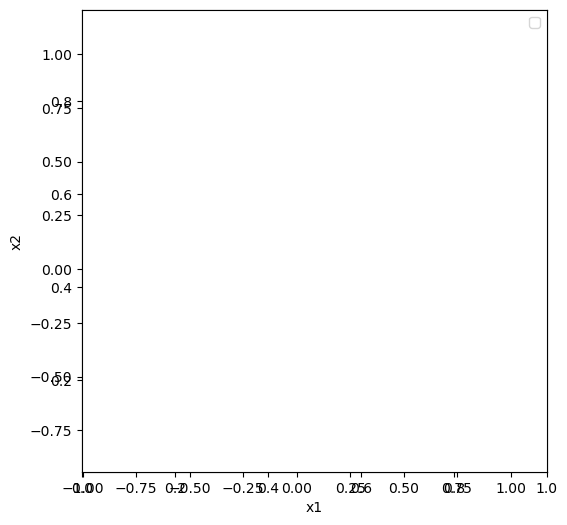

<Figure size 800x600 with 0 Axes>

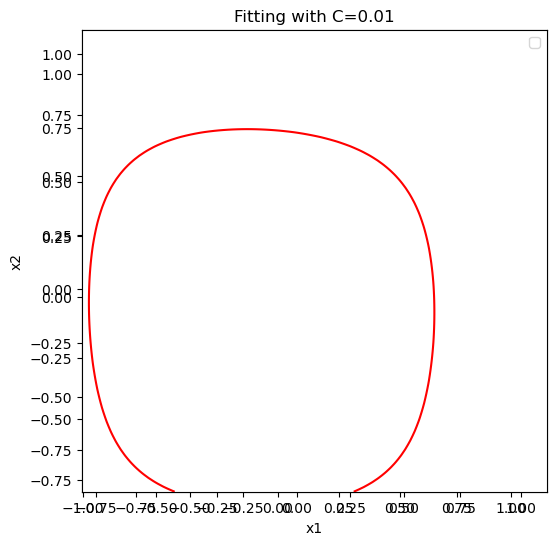


####### Results for C=1 #######
Train Accuracy: 0.8364
Test Accuracy : 0.8028


<Figure size 800x600 with 0 Axes>

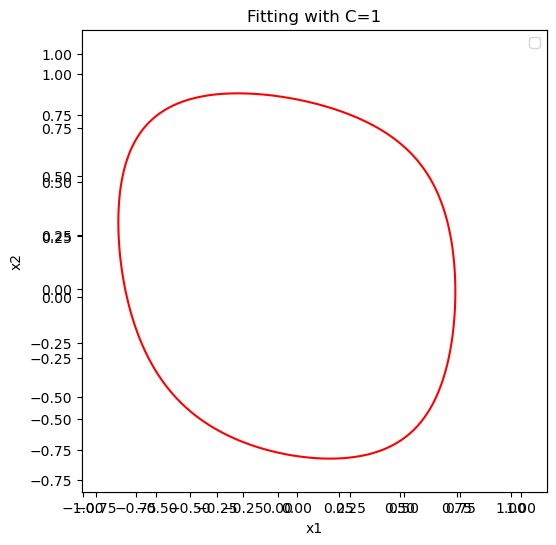


####### Results for C=10000 #######
Train Accuracy: 0.8606
Test Accuracy : 0.7887


<Figure size 800x600 with 0 Axes>

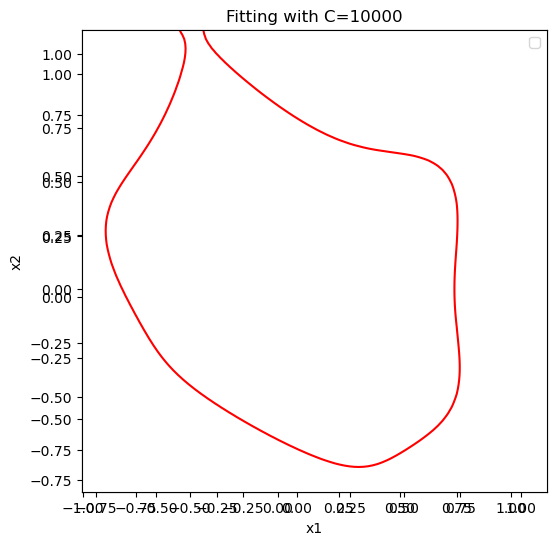

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    
    # Generate features for the mesh grid points
    v = map_features(dx.flatten(), dy.flatten(), order=order_no)
    
    # Calculate decision values
    z = (np.dot(classifier.coef_, v.T) + classifier.intercept_).reshape(100, 100)
    
    # Draw the contour line where z = 0
    plt.contour(dx, dy, z, levels=[0], colors=['r'])

if __name__ == "__main__":
    c_list = [0.01, 1, 10000]
    
    for c_val in c_list:
        clf = LogisticRegression(C=c_val, max_iter=1000).fit(X_train, y_train)
        
        print(f"\n####### Results for C={c_val} #######")
        print(f"Train Accuracy: {clf.score(X_train, y_train):.4f}")
        print(f"Test Accuracy : {clf.score(X_test, y_test):.4f}")
        
        plt.figure(figsize=(8, 6))
        draw_plot()  # Assuming draw_plot() visualizes the scatter of raw data
        plt.title(f'Fitting with C={c_val}')
        draw_boundary(clf)
        plt.legend()
        plt.show()